In [2]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/Shareddrives/utshabkg/Dataset/plasma_processed.csv')
df.head

<bound method NDFrame.head of     Unnamed: 0  1_5-anhydroglucitol  1-monostearin  ...  xylitol  xylose    Class
0            1                 9483            103  ...      154    1380  disease
1            2                27468            207  ...      324     929  disease
2            3                13976             86  ...      253     610  disease
3            4                19449            178  ...      223     746  disease
4            5                17209            258  ...      189    2022  disease
..         ...                  ...            ...  ...      ...     ...      ...
77          78                25149            184  ...      252     856  control
78          79                24181            142  ...      359    1003  control
79          80                23848            118  ...      453    1279  control
80          81                13848             97  ...     1450    1045  control
81          82                19669            187  ...      225    

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Columns: 160 entries, Unnamed: 0 to Class
dtypes: int64(159), object(1)
memory usage: 102.6+ KB


In [4]:
df.isnull().sum()/len(df) * 100

Unnamed: 0                         0.0
1_5-anhydroglucitol                0.0
1-monostearin                      0.0
2_3-dihydroxybutanoic acid NIST    0.0
2_4-diaminobutyric acid            0.0
                                  ... 
uridine                            0.0
valine                             0.0
xylitol                            0.0
xylose                             0.0
Class                              0.0
Length: 160, dtype: float64

In [87]:
labels = np.reshape(df.Class.to_numpy(), (82,1))

# PCA

In [88]:
from sklearn.decomposition import PCA
def pca_analysis(n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.iloc[:, :-1].values)

    pca_concatenate = np.concatenate([pca_result, labels], axis=1)

    return pca_concatenate

In [89]:
def make_dataframe(pca_array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'pc{i}')
    col.append('Class')
    return pd.DataFrame(pca_array, columns = col)

In [102]:
pca2 = pca_analysis(2)

pca2_df = make_dataframe(pca2, 2)
print(pca2_df.head)

<bound method NDFrame.head of         pc1      pc2    Class
0   27494.7 -4268.93  disease
1  -57539.2  4757.69  disease
2  -85672.8   104415  disease
3  -53732.4  22974.1  disease
4   48946.6  10084.1  disease
..      ...      ...      ...
77 -17470.6 -59355.6  control
78   146301  33375.9  control
79  75010.1 -77012.4  control
80   112923 -33203.6  control
81 -39521.3 -57006.7  control

[82 rows x 3 columns]>


<Figure size 432x288 with 0 Axes>

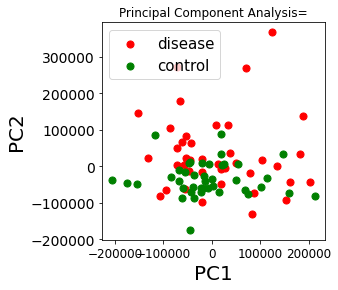

In [104]:
plt.figure()
plt.figure(figsize=(4, 4))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("Principal Component Analysis=",fontsize=12)
targets = ['disease', 'control']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df.Class == target
    plt.scatter(pca2_df.loc[indicesToKeep, 'pc1']
               , pca2_df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [108]:
def plotting(pca_df, rows, columns):
    fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(20, 4))

    for i in range(1, columns):
        for target, color in zip(targets,colors):
            indicesToKeep = df.Class == target
            axes[i-1].scatter(pca_df.loc[indicesToKeep, f'pc{i}']
                            , pca_df.loc[indicesToKeep, f'pc{i+1}'], c = color, s = 50)
    for target, color in zip(targets,colors):
        indicesToKeep = df.Class == target
        axes[columns-1].scatter(pca_df.loc[indicesToKeep, f'pc{columns}']
                        , pca_df.loc[indicesToKeep, 'pc1'], c = color, s = 50)

In [123]:
pca3 = pca_analysis(3)

pca3_df = make_dataframe(pca3, 3)
# print(pca3_df.head)

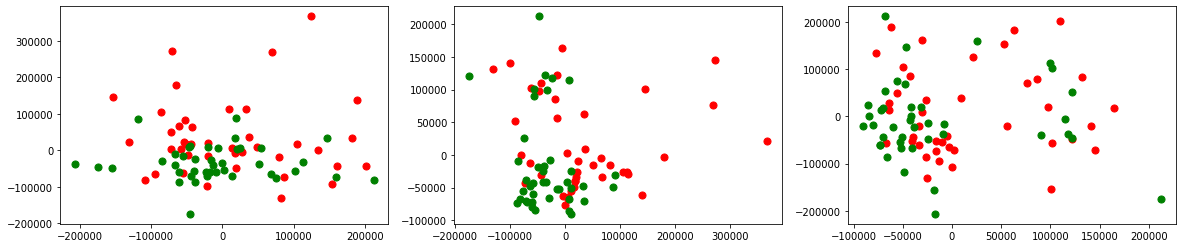

In [110]:
plotting(pca3_df, 1, 3)

In [122]:
pca4 = pca_analysis(4)

pca4_df = make_dataframe(pca4, 4)
# print(pca4_df.head)

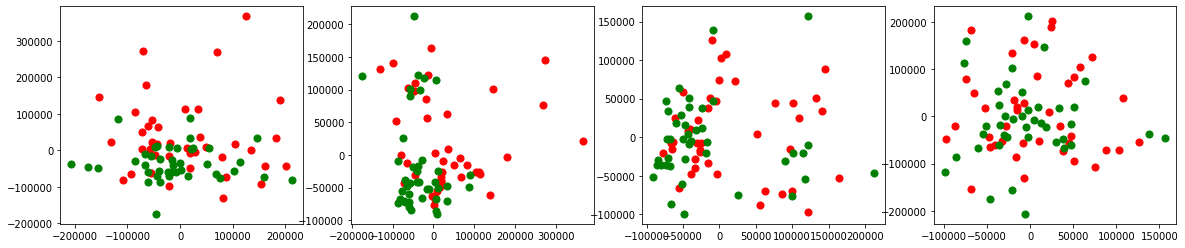

In [115]:
plotting(pca4_df, 1, 4)

In [121]:
pca5 = pca_analysis(5)

pca5_df = make_dataframe(pca5, 5)
# print(pca5_df.head)

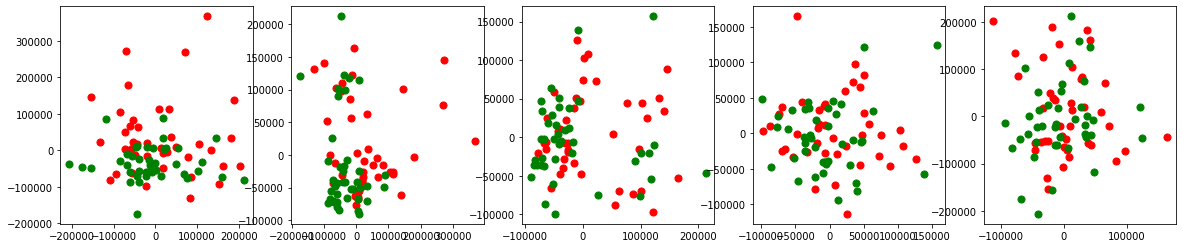

In [117]:
plotting(pca5_df, 1, 5)

In [137]:
# now do PCA for 10, 15, 20
pca10 = pca_analysis(10)
pca10_df = make_dataframe(pca10, 10)

pca15 = pca_analysis(15)
pca15_df = make_dataframe(pca15, 15)

pca20 = pca_analysis(20)
pca20_df = make_dataframe(pca20, 20)
# print(pca20_df.head)

In [139]:
pca20_df.to_csv("pca20.csv")